In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')

In [ ]:
df_new= df[df['month'].isin([1,2,3,4,5,6])]

In [ ]:
df_new.shape

(860347, 7)

In [ ]:
df_new.head(2)

,time_category_encoded,month,day,PULocationID,DOLocationID,trip_distance,total_amount
0,1,1,1,238,151,0.7,8.5
1,1,1,1,79,263,4.1,18.3


In [ ]:
df_new.drop('time_category_encoded', axis=1, inplace=True)

/tmp/ipython-input-3933126427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('time_category_encoded', axis=1, inplace=True)


In [ ]:
df_new.head()

,month,day,PULocationID,DOLocationID,trip_distance,total_amount
0,1,1,238,151,0.7,8.50
1,1,1,79,263,4.1,18.30
2,1,1,107,229,1.7,11.80
3,1,1,142,238,1.8,12.95
4,1,1,140,262,1.0,7.82


In [ ]:
df_new.isnull().sum()

,0
month,0
day,0
PULocationID,0
DOLocationID,0
trip_distance,0
total_amount,0


In [ ]:
y=df_new['total_amount']
x=df_new.drop(columns=['total_amount'])

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,random_state=7)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(645260, 5)
(645260,)
(215087, 5)
(215087,)


In [ ]:
#Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [ ]:
#  Grid Search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best model & predictions
best_model = grid_search.best_estimator_

In [ ]:
# Predict on train and test
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [ ]:
# Step 7: Evaluate Overfitting / Underfitting
print("\nTraining R2 Score:", r2_score(y_train, y_train_pred))
print("Testing R2 Score:", r2_score(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


Training R2 Score: 0.9154975396530535
Testing R2 Score: 0.9119112198233461
Training MSE: 15.496262924845103
Testing MSE: 16.050033666087952


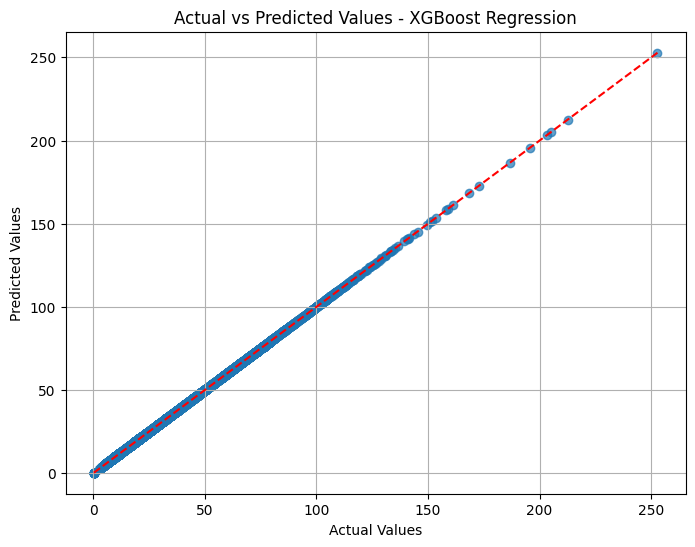

In [ ]:
# Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - XGBoost Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.grid(True)
plt.show()

In [27]:
# Pickle
import joblib
joblib.dump(best_model, 'xgb_model.pkl')
print("Saved tuned model: xgb_model.pkl")

Saved tuned model: xgb_model.pkl
